This is the KERAS CNN implementation for the MALARIA CELL IMAGES DATASET

Breakdown of this notebook:

Loading the dataset: Load the data and import the libraries.

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os
import cv2
from PIL import Image
# For CNN model creation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
SIZE = 64

In [2]:
!dir
os.path.isdir('.\\cell_images\\cell_images\\Parasitized')

 Volume in drive C has no label.
 Volume Serial Number is 34CD-A57C

 Directory of C:\SPB_Data\ee496

04/10/2020  08:41 AM    <DIR>          .
04/10/2020  08:41 AM    <DIR>          ..
04/10/2020  08:41 AM    <DIR>          .ipynb_checkpoints
04/07/2020  05:26 PM    <DIR>          cell_images
04/10/2020  08:41 AM           115,486 EE496_Malaria_Deteection-Copy1.ipynb
04/10/2020  08:41 AM           115,486 EE496_Malaria_Deteection.ipynb
               2 File(s)        230,972 bytes
               4 Dir(s)  173,270,511,616 bytes free


True

In [3]:
infected = os.listdir('.\\cell_images\\cell_images\\Parasitized') 
uninfected = os.listdir('.\\cell_images\\cell_images\\Uninfected')

In [4]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread(".\\cell_images\\cell_images\\Parasitized\\"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread(".\\cell_images\\cell_images\\Uninfected\\"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')

labels = np.array(labels)

In [5]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
  x_train, x_test = train_test_split(data, test_size=0.2, random_state=1,shuffle = True)
  y_train, y_test = train_test_split(labels, test_size=0.2, random_state=1)
  print(np.array(x_train).shape)

(22046, 64, 64, 3)


In [7]:
regulization_list = [0, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10]
# probability axis values 
prob = []
# loss axis values 
loss = []
for i in regulization_list:
    classifier = tf.keras.Sequential()
    classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(0.2))
    classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(0.2))
    classifier.add(Flatten())
    classifier.add(Dense( kernel_regularizer=l2(i),  activation = 'relu', units=512))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(kernel_regularizer=l2(i),  activation = 'relu', units=256))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(kernel_regularizer=l2(i), activation = 'sigmoid', units=2))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    print(classifier.summary())

    history = classifier.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 30, 
                         validation_split = 0.1,
                         shuffle = False)

    print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(x_test), np.array(y_test))[1]*100))
    loss.append(classifier.evaluate(np.array(x_test), np.array(y_test))[0])
    print(classifier.evaluate(np.array(x_test), np.array(y_test)))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

In [8]:
print(loss)
print(regulization_list)

[0.24569157453476728, 0.29668290945005177, 0.28265402074377777, 0.2860603167419288, 0.22977451944023544, 0.26345260602155773, 0.29117429094234987, 0.35062505458366716, 0.29261166532084626, 0.4516639039028539, 0.9835766942303827, 2.188570158228992, 3.1952175080170653]
[0, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]


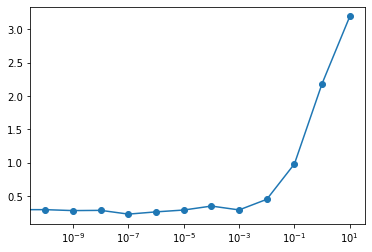

In [9]:
plt.semilogx(regulization_list, loss,'o-')